In [1]:
import scipy.io as spio

###  Heatmap for row norms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set_style('white')

#### Repeat for submatrices

In [3]:
n = 18
d = 3
np.random.seed(seed=10)
data = np.random.randn(n,d) / np.random.randn(n,d) # Ratio of two iid normals is cauchy
#data = np.append(data, np.identity(4), axis=0)
np.random.shuffle(data)

In [4]:
A = data[0:6,:]
B = data[6:12,:]
C = data[12:18, :]
#D = data[15:20, :]

In [5]:
def make_heat_map(X, name, cbar_flag):
    n,d = X.shape
    row_norms_X = np.sum(np.abs(X), axis=1)
    row_norms_X_matrix = np.asarray((list(row_norms_X) * n)).reshape(n,n).T[:,0:d]
    ax = sns.heatmap(row_norms_X_matrix / np.sum(row_norms_X), annot = X, cmap='Blues', cbar= cbar_flag,linewidth=0.5)
    plt.savefig(name + '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)
    return ax

In [6]:
def prep_data(X):
    n,d = X.shape
    row_norms_X = np.sum(np.abs(X), axis=1)
    row_norms_X_matrix = np.asarray((list(row_norms_X) * n)).reshape(n,n).T[:,0:d]
    return row_norms_X, row_norms_X_matrix

In [7]:
row_norms_data, row_norms_data_matrix = prep_data(data)

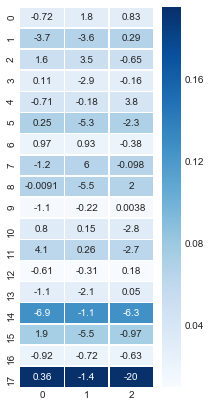

In [8]:
fig, ax = plt.subplots(figsize=(3,7))
sns.heatmap(row_norms_data_matrix / np.sum(row_norms_data), annot = data, cmap='Blues',linewidth=0.5,
            ax=ax, cbar_ax=None)
fig.savefig('data.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

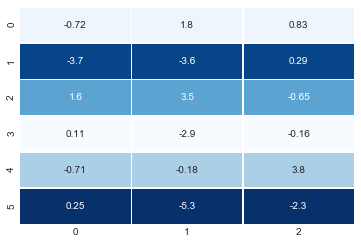

In [9]:
make_heat_map(A, 'block1', cbar_flag=False)

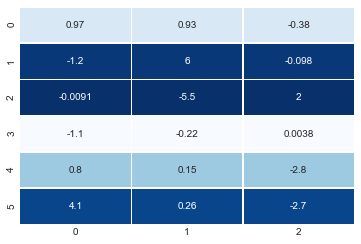

In [10]:
make_heat_map(B, 'block2',cbar_flag=False)

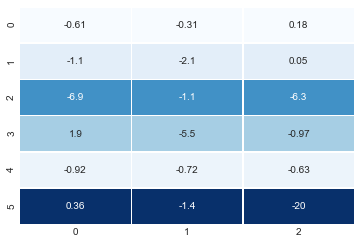

In [11]:
make_heat_map(C, 'block3',cbar_flag=False)

In [12]:
row_norms_A, row_norm_mat_A = prep_data(A)

row_norms_B, row_norm_mat_B = prep_data(B)
row_norm_mat_B

row_norms_C, row_norm_mat_C = prep_data(C)
row_norm_mat_C

array([[  1.10562718,   1.10562718,   1.10562718],
       [  3.22110802,   3.22110802,   3.22110802],
       [ 14.25469717,  14.25469717,  14.25469717],
       [  8.38366839,   8.38366839,   8.38366839],
       [  2.27804268,   2.27804268,   2.27804268],
       [ 22.0364336 ,  22.0364336 ,  22.0364336 ]])

NameError: name 'i' is not defined

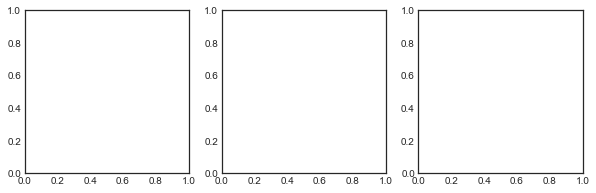

In [13]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

sns.heatmap(row_norm_mat_A / np.sum(row_norms_A), annot = A, cmap='Blues',linewidth=0.5, ax=ax[0],
                cbar=i == 0,
                cbar_ax=None)
sns.heatmap(row_norm_mat_B / np.sum(row_norms_B), annot = B, cmap='Blues',linewidth=0.5, ax=ax[1],
                cbar=i == 0,
                cbar_ax=None)
sns.heatmap(row_norm_mat_C / np.sum(row_norms_C), annot = B, cmap='Blues',linewidth=0.5, ax=ax[2],
                cbar=i == 0,
                cbar_ax=None)

fig.savefig('blocks.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

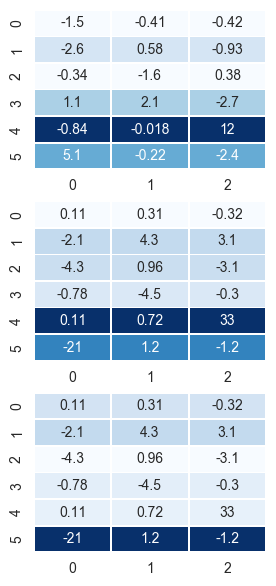

In [56]:
fig, ax = plt.subplots(3,1, figsize=(3,7))

sns.heatmap(row_norm_mat_A / np.sum(row_norms_A), annot = A, cmap='Blues',linewidth=0.5, ax=ax[0],
                cbar=i == 0,
                cbar_ax=None)
sns.heatmap(row_norm_mat_B / np.sum(row_norms_B), annot = B, cmap='Blues',linewidth=0.5, ax=ax[1],
                cbar=i == 0,
                cbar_ax=None)
sns.heatmap(row_norm_mat_C / np.sum(row_norms_C), annot = B, cmap='Blues',linewidth=0.5, ax=ax[2],
                cbar=i == 0,
                cbar_ax=None)

fig.savefig('blocks_col.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

#### Finalise
Tidy into a subplot

/Users/charliedickens/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


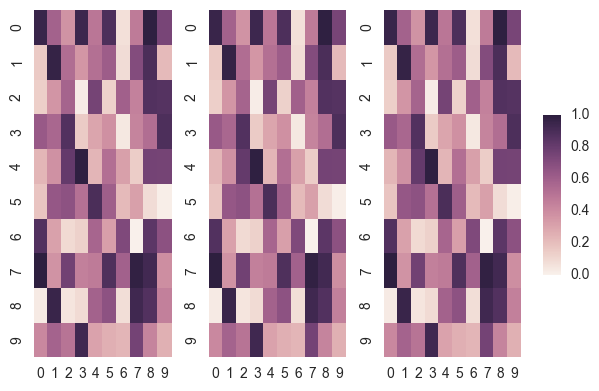

In [51]:
df = pd.DataFrame(np.random.random((10,10,)))

fig, axn = plt.subplots(1, 3)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(df, ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cbar_ax=None if i else cbar_ax)

fig.tight_layout(rect=[0, 0, .9, 1])

## Plot of $(x,y)$ pairs and leverage

In [205]:
import sklearn
from sklearn.datasets import make_blobs, make_regression, make_circles, make_moons
plt.style.use('seaborn-talk')

In [213]:
X,y,coefs = make_regression(100,1,noise=15,coef=True)

In [214]:
X.shape
ones = np.ones_like(X)
ones.shape
data = np.c_[ones, X]

In [215]:
x_hat = np.linalg.lstsq(X,y)[0]
predictions = X@x_hat

In [216]:
basis, R = np.linalg.qr(data)
row_norms = np.linalg.norm(basis,ord=2, axis=1)
row_norms.shape

(100,)

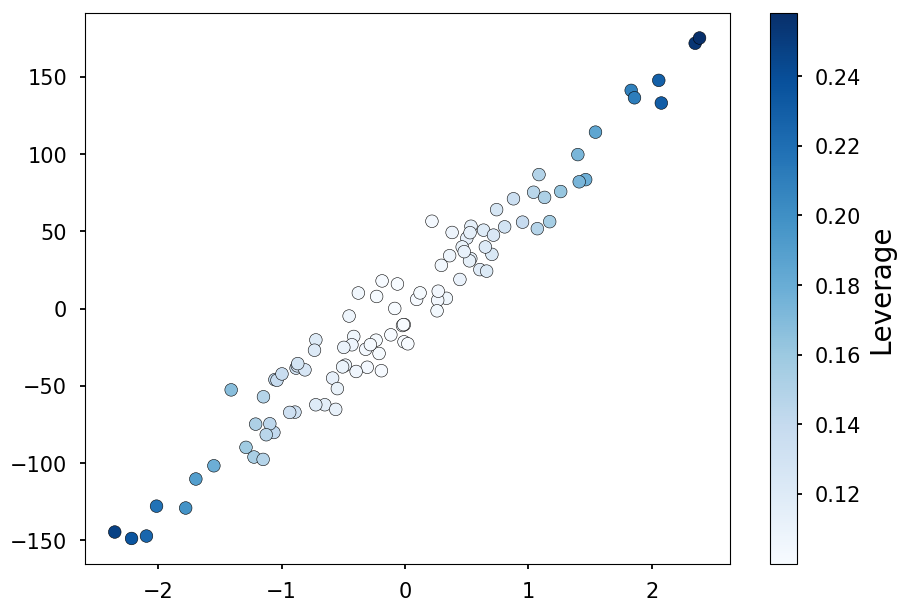

In [218]:
fig, ax = plt.subplots()
f = ax.scatter(X, y, c=row_norms, cmap="Blues", edgecolors='k')
ax.tick_params(labelsize=15)
cbar = fig.colorbar(f, ax=ax, )
cbar.set_label("Leverage", size=20)
cbar.ax.tick_params(labelsize=15) 


fig.savefig('linear_leverage.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [201]:
X1, Y1 = make_circles(n_samples=200, random_state=0, noise=0.05)
basis,_ = np.linalg.qr(X1)
row_norms = np.linalg.norm(basis,ord=2, axis=1)**2
row_norms.shape

(200,)

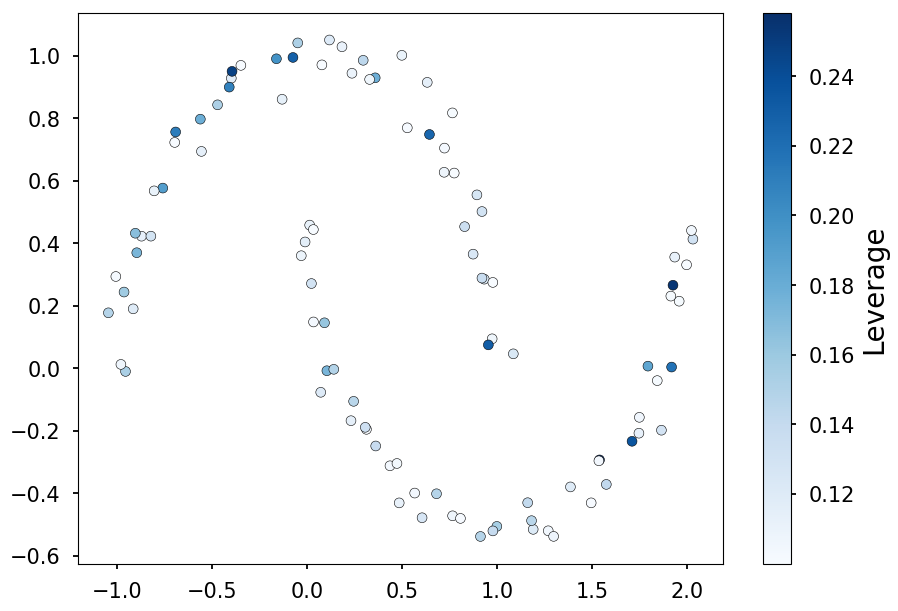

In [219]:
fig, ax = plt.subplots()

ax.scatter(X1[:, 0], X1[:, 1], edgecolors='k',
            c=row_norms, cmap='Blues',
            s=50, edgecolor='k')
ax.tick_params(labelsize=15)
cbar = fig.colorbar(f, ax=ax, )
cbar.set_label("Leverage", size=20)
cbar.ax.tick_params(labelsize=15) 

fig.savefig('circle_leverage.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

In [206]:
X1, Y1 = make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=0)
basis,_ = np.linalg.qr(X1)
row_norms = np.linalg.norm(basis,ord=2, axis=1)**2
row_norms.shape

(100,)

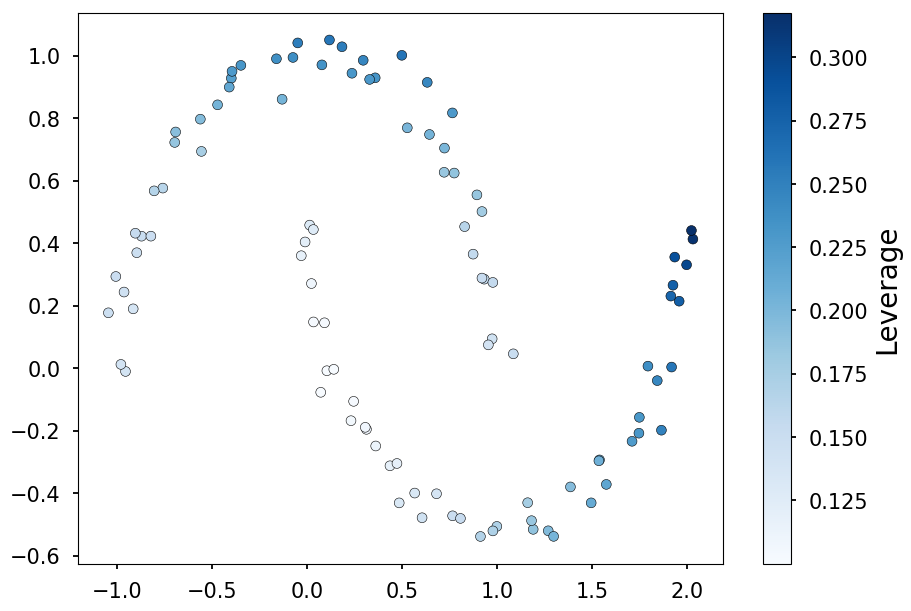

In [207]:
fig, ax = plt.subplots()

ax.scatter(X1[:, 0], X1[:, 1], edgecolors='k',
            c=row_norms, cmap='Blues',
            s=50, edgecolor='k')
ax.tick_params(labelsize=15)
cbar = fig.colorbar(f, ax=ax, )
cbar.set_label("Leverage", size=20)
cbar.ax.tick_params(labelsize=15) 